# Introduction to Machine Learning Homework 2

## Instructions

This homework is due **before class on Friday, April 4th.**

Important notes:
- Please submit the notebook with the output.
- If the answer is not obvious from the printout, please type it.
- The notebook should be self contained and we should be able to rerun it.
- Import all the libraries that you find necessary to answer the questions.
- If the subquestion is worth 1 point, no half points will be given: full point will be given to the correct answer. Similarly if the question is worth 2, possible points are 0,1,2. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import set_config
set_config(display="text")

## Question 1

**Total 14 points**

The dataset will be used for classification, and the target value is stored in the column named *target*.

1. Import the csv file "HW2_Q1data.csv" into pandas dataframe and view the first 5 rows. (1pt)
2. Which are categorical and which are the numerical features? (1pt)
3. Visualize the relationships between each pair of "G" features (G1, G2, G3)  and the target. (1pt)
4. Split the data into train and test, leaving 25% for the test set. Set the random_state to 42. (1pt)
5. Using pipeline, do one hot encoding for all the categorical variables, standardize the numerical features and perform a GridSearch with 5 fold cross validation that maximizes the f1 score to find the parameters of logistic regression: (7pt)
    - For Logistic Regression: check penalty 'l1' and 'l2', regularization strength of 0.001 and 0.1, and set random state to 42;
    - For one hot encoding: drop the first category in each feature. \
List the parameters of the pipeline.\
Note: choose the right order of steps in the pipeline.  
6. What are the best parameters found in step 5? (1pt)
7. What are the second best parameters found in step 5? (1pt)
8. Check the f1 score of the best model on the test set set and compare it with the cross validation performance. (1pt)

### 1.1. Import the csv file "HW2_Q1data.csv" into pandas dataframe and view the first 5 rows. (1pt)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [5]:
df1 = pd.read_csv('HW2_Q1data.csv')
df1.head(5)

ID Subject school sex  age address famsize Pstatus  Medu  Fedu  ...  \
0  100097     Por     GP   F   16       U     GT3       A     3     4  ...   
1  101021     Por     GP   F   17       U     GT3       T     3     2  ...   
2  102965     Por     GP   M   16       U     LE3       T     1     2  ...   
3  102989     Por     MS   M   17       U     GT3       T     2     3  ...   
4  103131     Por     GP   F   16       U     GT3       T     1     1  ...   

  freetime goout Dalc Walc  health  absences  G1  G2  G3 target  
0        2     1    1    4       5        12  15  13  14      0  
1        3     4    1    3       3         2  17  18  17      0  
2        4     5    3    5       5         0   9   8  10      0  
3        4     3    1    1       3         4  14  15  16      0  
4        3     2    1    4       5         2  12  13  13      0  

[5 rows x 36 columns]

In [6]:
df1['target'].value_counts() #not necessary

target
0    814
1    230
Name: count, dtype: int64

### 1.2. Which are categorical and which are the numerical features? (1pt)

In [7]:
categorical=df1.drop(columns='target').select_dtypes(exclude=['float64','int64']).columns
numerical=df1.drop(columns='target').select_dtypes(include=['float64','int64']).columns
print(categorical)
print(numerical)

Index(['Subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
Index(['ID', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3'],
      dtype='object')


### 1.3. Visualize the relationships between each pair of "G" features (G1, G2, G3) and the target. (1pt)

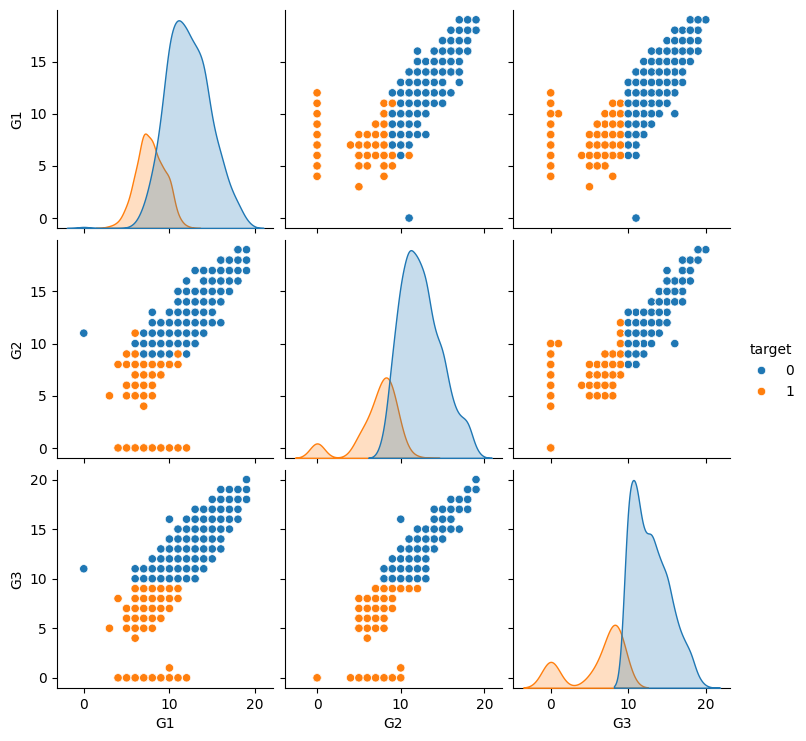

In [8]:
sns.pairplot(df1[['G1', 'G2', 'G3', 'target']], hue = 'target');

### 1.4. Split the data into train and test, leaving 25% for the test set. Set the random_state to 42. (1pt)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns={'target'}), 
                                                    df1['target'], test_size=0.25, random_state=42)

### 1.5 Using a pipeline, do one hot encoding for all the categorical variables, standardize the numerical features and perform a GridSearch with 5 fold cross validation that maximizes the f1 score to find the parameters of logistic regression: (7pt)

- For Logistic Regression: check ridge and lasso penalties, regularization strength of 0.001 and 0.1, and set random state to 42;
- For one hot encoding: drop the first category in each feature.\
List the parameters of the pipeline (dictionary of pipeline attributes).\
Note: choose the right order of steps in the pipeline. 

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [11]:
ct = make_column_transformer(
    (StandardScaler(), numerical),
    ( OneHotEncoder( sparse_output=False,drop='first'), categorical ))
    # ordinal features were already encoded as such
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 Index(['ID', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3'],
      dtype='object')),
                                ('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 Index(['Subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])

In [12]:
pipe = Pipeline([('preprocessing', ct),
                 ('classifier', LogisticRegression(solver = 'liblinear', random_state=42))
                ])

In [13]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'classifier', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__standardscaler', 'preprocessing__onehotencoder', 'preprocessing__standardscaler__copy', 'preprocessing__standardscaler__with_mean', 'preprocessing__standardscaler__with_std', 'preprocessing__onehotencoder__categories', 'preprocessing__onehotencoder__drop', 'preprocessing__onehotencoder__dtype', 'preprocessing__onehotencoder__feature_name_combiner', 'preprocessing__onehotencoder__handle_unknown', 'preprocessing__onehotencoder__max_categories', 'preprocessing__onehotencoder__min_frequency', 'preprocessing__onehotencoder__sparse_output', 'classifier__C', 'classifier__class_weight', 'classifier__dual', 'classifier__fit_intercept', 'classi

In [14]:
param_grid = [
     {'classifier__C': [(1/0.001), (1/0.1)],
      'classifier__penalty': ['l1', 'l2']
    }
]

In [15]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['ID', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3'],
      dtype='object')),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=F...
                                                                         Index(['Subject', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
       'Fjob', 'reason

### 1.6. What are the best parameters found in step 5? (1pt)

In [16]:
print('Best params:\n\n', grid.best_params_)

Best params:

 {'classifier__C': 10.0, 'classifier__penalty': 'l1'}


### 1.7. What are the second best parameters found in step 5? (1pt)

In [17]:
results = pd.DataFrame(grid.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.025443      0.009775         0.009191        0.003258   
1       0.020029      0.003350         0.009523        0.003184   
2       0.030255      0.005363         0.006926        0.006157   
3       0.016991      0.007207         0.011026        0.005848   

   param_classifier__C param_classifier__penalty  \
0               1000.0                        l1   
1               1000.0                        l2   
2                 10.0                        l1   
3                 10.0                        l2   

                                                   params  split0_test_score  \
0  {'classifier__C': 1000.0, 'classifier__penalty': 'l1'}           1.000000   
1  {'classifier__C': 1000.0, 'classifier__penalty': 'l2'}           1.000000   
2    {'classifier__C': 10.0, 'classifier__penalty': 'l1'}           1.000000   
3    {'classifier__C': 10.0, 'classifier__penalty': 'l2'}           0.969697   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           1.000000           1.000000           0.957746                1.0   
1           0.985075           1.000000           0.985507                1.0   
2           1.000000           1.000000           1.000000                1.0   
3           0.939394           0.985075           0.888889                1.0   

   mean_test_score  std_test_score  rank_test_score  
0         0.991549        0.016901                3  
1         0.994116        0.007207                2  
2         1.000000        0.000000                1  
3         0.956611        0.039362                4

In [18]:
results[results.rank_test_score==2].params

1    {'classifier__C': 1000.0, 'classifier__penalty': 'l2'}
Name: params, dtype: object

### 1.8. Calculate the f1 score of the best model on the test set and compare it with the cross validation performance. (1pt)

In [19]:
from sklearn.metrics import f1_score
y_pred = grid.predict(X_test)
f1_score(y_test, y_pred)

1.0

Computing the score per fold and then averaging the results is not the same as calculating the score for the entire dataset. 

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(grid.best_estimator_, X_test, y_test, scoring = 'f1')
scores

array([1.        , 1.        , 0.95652174, 1.        , 0.96      ])

In [21]:
scores.mean() 

0.9833043478260869

Note: train cv was also accepted.

## Question 2

**Total 18 points**

In this question we will be using the Titanic dataset that contains demographics and information on passengers and crew. The ship Titanic sank after colliding with an iceberg, killing more than half the people on board. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others. The target in the dataset corresponds to whether the person survived or not.

1. Import the csv file "HW2_Q2data.csv" into pandas dataframe, check the number of rows, check the data types, view the first 10 rows and check the target distribution (1pt)
2. Check the number of missing values per column and drop the column if it has more than 90% of values missing (1pt)
3. Split the data into train and test, leaving 30% for the test set. Set the random_state to 42 (1pt)
4. Using pipeline, do the following (not necessarily in this order, but choose the right order of steps in the pipeline) (12pts)
    - Use SMOTENC for balancing
    - Normalize the numerical variables
    - Perform one-hot encoding for all the nominal variables by keeping all the dummy variables
    - Use mean imputing for numerical variables and mode for the nominal
    - Use randomized search with random state 42, and 25 combinations of parameters to select the best classifier: try Random Forest and CatBoost
    - Use ROC Area under the curve as the criterion for model selection and tuning
    - The cross validation needs 5 splits that shuffles the data the same number of times and keeps the same proportion of target classes, the test size of 0.3 and a random_state = 42

Tip: after using the column transformer, the column names are replaced with indices

For Random Forest
   - tune the number of trees by testing the values from 400 to 800 (including 800) with the step size of 100
   - tune the maximum tree depth by testing the values from 7 to 12 (including 12)
   - tune the minimum number of samples required to split an internal node with values from 5 to 14 (including 14); also, set the random state to 42

For CatBoost
   - tune the learning rate by testing the values [0.001, 0.01, 0.1]
   - tune the maximum tree depth by testing the values from 4 to 9 (including 9)
   - tune the percentage of features to be randomly selected on each iteration by sampling uniformly from the interval of 0.2 to 0.9 (including 0.9) 
   - tune the weight of the minority class (class 1) by testing the values 1 and 3; also, set the seed to 42.

Tip: consider whether any of these algorithms does not require onehot encoding.

5. What are the parameters of the best classifier found in step 4? Display all the parameters. (1pt)
6. Using the test set, plot the ROC AUC curve (including the random guessing baseline) of the best model found in step 4 and calculate the percentage of those who survived that the model correctly identified, if we classify as class 1 all instances that have probability of belonging to class 1 above 0.3. (2pt)

### 2.1. Import the csv file "HW2_Q2data.csv" into pandas dataframe, check the number of rows, check the data types, view the first 10 rows and check the target distribution (1pt)

In [22]:
df2 = pd.read_csv('HW2_Q2data.csv')
df2.head(10)

pclass     sex      age  sibsp  parch      fare embarked   body  target
0     1.0  female  29.0000    0.0    0.0  211.3375        S    NaN       1
1     1.0    male   0.9167    1.0    2.0  151.5500        S    NaN       1
2     1.0  female   2.0000    1.0    2.0  151.5500        S    NaN       0
3     1.0    male  30.0000    1.0    2.0  151.5500        S  135.0       0
4     1.0  female  25.0000    1.0    2.0  151.5500        S    NaN       0
5     1.0    male  48.0000    0.0    0.0   26.5500        S    NaN       1
6     1.0  female  63.0000    1.0    0.0   77.9583        S    NaN       1
7     1.0    male  39.0000    0.0    0.0    0.0000        S    NaN       0
8     1.0  female  53.0000    2.0    0.0   51.4792        S    NaN       1
9     1.0    male  71.0000    0.0    0.0   49.5042        C   22.0       0

In [23]:
df2['target'].value_counts()

target
0    809
1    500
Name: count, dtype: int64

In [24]:
print(f"The number of rows is {df2.shape[0]}.")

The number of rows is 1309.


In [25]:
df2.dtypes

pclass      float64
sex          object
age         float64
sibsp       float64
parch       float64
fare        float64
embarked     object
body        float64
target        int64
dtype: object

or

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   sex       1309 non-null   object 
 2   age       1046 non-null   float64
 3   sibsp     1309 non-null   float64
 4   parch     1309 non-null   float64
 5   fare      1308 non-null   float64
 6   embarked  1307 non-null   object 
 7   body      121 non-null    float64
 8   target    1309 non-null   int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 92.2+ KB


### 2.2. Check the number of missing values per column and drop the column if it has more than 90% of values missing (1pt)

In [27]:
df2.isnull().sum()/len(df2)

pclass      0.000000
sex         0.000000
age         0.200917
sibsp       0.000000
parch       0.000000
fare        0.000764
embarked    0.001528
body        0.907563
target      0.000000
dtype: float64

The feature "body" has more than 90% of values missing, and therefore it will be removed.

In [28]:
df2.drop(columns=['body'], inplace=True)

or

In [29]:
#df2=df2.drop(columns='body')

### 2.3. Split the data into train and test, leaving 30% for the test set. Set the random_state to 42 (1pt)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns=['target']), df2['target'],
                                                    test_size=0.30, random_state=42)

### 2.4. Using pipeline, do the following (not necessarily in this order, but choose the right order of steps in the pipeline)
- Use SMOTENC for balancing
- Normalize the numerical variables
- Perform one-hot encoding for all the nominal variables by keeping all the dummy variables
- Use mean imputing for numerical variables and mode for the nominal
- Use randomized search with random state 42, and 25 combinations of parameters to select the best classifier: try Random Forest and CatBoost
- Use ROC Area under the curve as the criterion for model selection and tuning
- The cross validation needs 5 splits that shuffles the data the same number of times and keeps the same proportion of target classes, the test size of 0.3 and a random_state = 42

Tip: after using the column transformer, the column names are replaced with indexes 



### For the Random Forest
- tune the number of trees by testing the values from 400 to 800 (including 800) with the step size of 100
- tune the maximum tree depth by testing the values from 7 to 12 (including 12)
- tune the minimum number of samples required to split an internal node with values from 5 to 14 (including 14); also, set the random state to 42

### For CatBoost
- tune the learning rate by testing the values [0.001, 0.01, 0.1]
- tune the maximum tree depth by testing the values from 4 to 9 (including 9)
- tune the percentage of features to be randomly selected on each iteration by sampling uniformly from the interval of 0.2 to 0.9 (including 0.9)
- tune the weight of the minority class (class 1) by testing the values 1 and 3; also, set the seed to 42.

Tip: consider whether any of these algorithms does not require onehot encoding.

### (12pt)

In [31]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedShuffleSplit
import scipy.stats as sp

In [32]:
df2

pclass     sex      age  sibsp  parch      fare embarked  target
0        1.0  female  29.0000    0.0    0.0  211.3375        S       1
1        1.0    male   0.9167    1.0    2.0  151.5500        S       1
2        1.0  female   2.0000    1.0    2.0  151.5500        S       0
3        1.0    male  30.0000    1.0    2.0  151.5500        S       0
4        1.0  female  25.0000    1.0    2.0  151.5500        S       0
...      ...     ...      ...    ...    ...       ...      ...     ...
1304     3.0  female  14.5000    1.0    0.0   14.4542        C       0
1305     3.0  female      NaN    1.0    0.0   14.4542        C       0
1306     3.0    male  26.5000    0.0    0.0    7.2250        C       0
1307     3.0    male  27.0000    0.0    0.0    7.2250        C       0
1308     3.0    male  29.0000    0.0    0.0    7.8750        S       0

[1309 rows x 8 columns]

Note: passenger class (pclass) is likely an ordinal feature already encoded as such (its categories have an ordinal relationship) and ergo, in the case of missing values, "most frequent" could be a better approach than 'mean' for imputation, if these were present—since there weren't, this was not graded. Similarly, as encoding was already performed, pclass should not be onehot encoded, which is solved by considering pclass a numerical variable. In light of this, it was also fine not treating it as a categorical variable in subsequent methods like SMOTENC.

In [33]:
numerical = df2.select_dtypes(include=[np.number]).drop(columns=['target'])
categorical = df2.select_dtypes(include=['object'])

In [34]:
df2.shape

(1309, 8)

In [35]:
list(numerical.columns), categorical.columns

(['pclass', 'age', 'sibsp', 'parch', 'fare'],
 Index(['sex', 'embarked'], dtype='object'))

In [36]:
df2

pclass     sex      age  sibsp  parch      fare embarked  target
0        1.0  female  29.0000    0.0    0.0  211.3375        S       1
1        1.0    male   0.9167    1.0    2.0  151.5500        S       1
2        1.0  female   2.0000    1.0    2.0  151.5500        S       0
3        1.0    male  30.0000    1.0    2.0  151.5500        S       0
4        1.0  female  25.0000    1.0    2.0  151.5500        S       0
...      ...     ...      ...    ...    ...       ...      ...     ...
1304     3.0  female  14.5000    1.0    0.0   14.4542        C       0
1305     3.0  female      NaN    1.0    0.0   14.4542        C       0
1306     3.0    male  26.5000    0.0    0.0    7.2250        C       0
1307     3.0    male  27.0000    0.0    0.0    7.2250        C       0
1308     3.0    male  29.0000    0.0    0.0    7.8750        S       0

[1309 rows x 8 columns]

In [37]:
from imblearn.pipeline import Pipeline 

numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

missings_preprocessor = ColumnTransformer([
    ('numerical', numerical_preprocessor, list(numerical.columns)),
    ('categorical', SimpleImputer(strategy='most_frequent'), list(categorical.columns))
])

onehot_preprocessor = ColumnTransformer([ 
    ('onehot_preprocessor', 'passthrough', [5,6]) 
], remainder = 'passthrough')

pipe = Pipeline([
    ('missings', missings_preprocessor),
    ('sampling', SMOTENC(categorical_features=[5,6], random_state=42)), 
    ('onehot', onehot_preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
    

param_grid = [
    {'classifier': [RandomForestClassifier(random_state=42)],
     'classifier__n_estimators': list(np.arange(400,801,100)),
     'classifier__max_depth': list(np.arange(7,13)),
     'classifier__min_samples_split': list(np.arange(5,15)),
     'onehot__onehot_preprocessor': [OneHotEncoder(sparse_output=False)]},
    
    {'classifier': [CatBoostClassifier(cat_features=[0,1], random_seed=42)],
     'classifier__learning_rate': [0.001, 0.01, 0.1],
     'classifier__max_depth': list(np.arange(4,10)),
     'classifier__feature_fraction': sp.uniform(loc=0.2, scale=0.7), #colsample_bylevel and rsm work too 
     'classifier__scale_pos_weight': [1, 3],
     'sampling': [None, SMOTENC(categorical_features=[5,6], random_state=42)] #not necessary
}
]

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

random = RandomizedSearchCV(pipe, param_grid, cv = sss, n_iter = 25, scoring = 'roc_auc', random_state=42)
random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=None),
                   estimator=Pipeline(steps=[('missings',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['pclass',
                                                                                'age',
                                                                                'sibsp',
                       

### 2.5. What are the parameters of the best classifier found in step 4? Display all the parameters. (1pt)

In [38]:
random.best_estimator_.named_steps['classifier'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 700,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### 2.6. Using the test set, plot the ROC AUC curve (including the random guessing baseline) of the best model found in step 4 and calculate the percentage of those who survived that the model correctly identified, if we classify as class 1 all instances that have probability of belonging to class 1 above 0.3. (2pt)

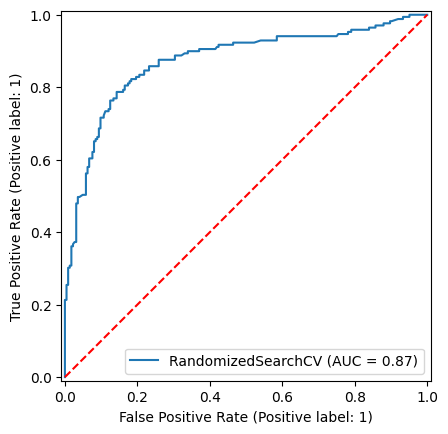

In [39]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(random, X_test, y_test)
plt.plot([0, 1], [0, 1], 'r--');

In [40]:
from sklearn.metrics import recall_score 

y_test_pred_prob = random.predict_proba(X_test)
y_pred_new = (y_test_pred_prob[:,1] >= 0.3).astype(int) #both > and >= are okay

print('recall is', recall_score(y_test, y_pred_new))

recall is 0.863905325443787


## Question 3

**Total 20 points**


1. Import the csv file "HW2_Q3data.csv" into pandas dataframe, view the first 5 rows (1pt)
2. Standardize the data. (1pt)
3. Run KMeans for the number of clusters varying from 3 to 17, with a smart initialization method. Use three metrics to choose the number of clusters. Choose the number of clusters and justify your decision. Set the random_state to 0. (6pts)
4. Rerun KMeans for the selected number of clusters. (1pt)
5. Visualize the clusters using TSNE, for 4 different values of the hyperparameter perplexity. Color each cluster with a different color. Set the random_state to 42 (Clusters from step 3). Which value of the hyperparameter helps the most to visualize the clusters, explain your choice. (3pt)
6. Visualize the clusters using UMAP, for  4 different values of the hyperparameter nearest neighbors. Color each cluster with a different color. Which value of the hyperparameter help the most to visualize the clusters, explain your choice (Clusters chosen in step 3). (3pt)
7. Use the cluster assignments as labels and run decision tree of depth 2 on the data (no need for train test split). Visualize the tree, print the total number of nodes, and create a DataFrame with only one column denoting the features importance in descending order. (3pts)
8. Run DBSCAN for values of epsilon 1, 2, and 3. What percentage of points does not get assigned to a single cluster for each value of epsilon? (2pts)

In [41]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3.1. Import the csv file "HW2_Q3data.csv" into pandas dataframe, view the first 5 rows (1pt)

In [42]:
df3 = pd.read_csv('HW2_Q3data.csv')
df3.head()

column_0   column_1   column_2   column_3   column_4   column_5  \
0  14.959778  -8.292856  -4.268898   2.494952   5.348119  12.345096   
1 -26.473957  13.624976 -13.770128  18.757474  -5.266403   8.901348   
2  -5.683369   4.232104   6.115342   3.529199 -13.201355   0.361081   
3   3.899924   5.521090  10.988120 -19.354397  -3.301060  21.170981   
4 -14.243462  -7.372801  -8.218910  17.015158   1.273587 -21.891420   

    column_6   column_7   column_8   column_9  column_10  column_11  \
0  -4.665881  -6.473640  11.550935 -25.064908 -20.075828  -6.545797   
1 -18.516784   7.362937  13.923298   7.133864  15.057795  -7.372422   
2  18.671149 -16.705182 -20.098721  -8.431112  16.717392   7.684692   
3   4.560688 -10.576319  22.573553   0.439612  16.991625 -14.110050   
4   2.943212 -27.603012  19.859143   8.277291   7.959668   7.124812   

   column_12  column_13  column_14  
0   3.727199  20.365724  -2.574969  
1   6.516423   2.569296   2.430212  
2   4.684619  13.930232 -26.830573  
3   7.765042  13.978936  26.183241  
4  -2.461983  -0.516308   8.995661

### 3.2. Standardize the data. (1pt)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df3)

### 3.3. Run KMeans for the number of clusters varying from 3 to 17, with a smart initialization method. Use three metrics to choose the number of clusters. Choose the number of clusters and justify your decision. Set the random_state to 0. (6pts)

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

scores = {'SSE': [], 'Silhouette Coefficient': [], 'David Bouldin Score': []}

for k in range(3,18):
    
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=0)
    kmeans.fit(X_scaled)
    silhouette_results = silhouette_score(X_scaled, kmeans.labels_)
    DB_results = davies_bouldin_score(X_scaled, kmeans.labels_)
    
    scores['SSE'].append(kmeans.inertia_)
    scores['Silhouette Coefficient'].append(silhouette_results)
    scores['David Bouldin Score'].append(DB_results)



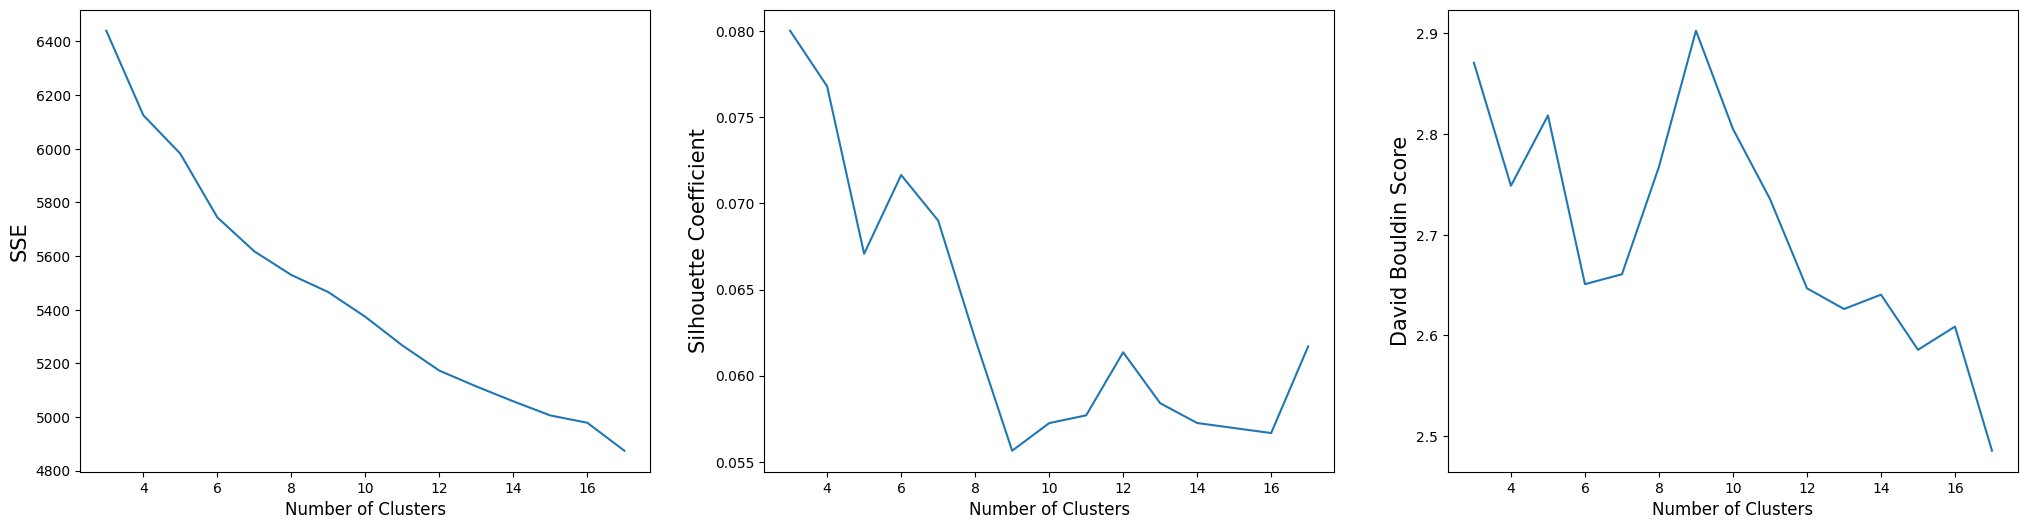

In [45]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(25,6))

for score_i, ax in zip(scores, axes.ravel()):
    ax.plot(range(3,18), scores[score_i])
    ax.set_xlabel('Number of Clusters', fontsize=12)
    ax.set_ylabel(score_i, fontsize=15)
    

Possible method to aid the justification, but not required.

In [46]:
sse = pd.Series(scores['SSE'], index=range(3,18))
sil = pd.Series(scores['Silhouette Coefficient'], index=range(3,18))
db = pd.Series(scores['David Bouldin Score'], index=range(3,18))

scores_df = pd.concat([sse,sse.diff(), sil, sil-sil.max(), db, db-db.min()], axis = 1)

scores_df.rename(columns = {0: 'SSE',1: 'SSE Diff', 2: 'Silhouette Coefficient', 
                            3:'Silhouette Coefficient Diff from Max',
                            4:'David Bouldin Score', 5: 'David Bouldin Score Diff from Min'}, inplace=True)

scores_df.index.name = 'Number of Clusters'
scores_df

SSE    SSE Diff  Silhouette Coefficient  \
Number of Clusters                                                    
3                   6440.166211         NaN                0.080030   
4                   6125.198482 -314.967728                0.076801   
5                   5981.741977 -143.456506                0.067077   
6                   5744.407864 -237.334113                0.071651   
7                   5617.737625 -126.670239                0.069006   
8                   5529.659022  -88.078602                0.062129   
9                   5465.651787  -64.007235                0.055639   
10                  5373.689261  -91.962526                0.057241   
11                  5266.928246 -106.761016                0.057694   
12                  5173.045265  -93.882981                0.061355   
13                  5114.008030  -59.037235                0.058399   
14                  5058.525620  -55.482410                0.057247   
15                  5005.924833  -52.600787                0.056956   
16                  4978.593859  -27.330974                0.056665   
17                  4874.426383 -104.167476                0.061700   

                    Silhouette Coefficient Diff from Max  David Bouldin Score  \
Number of Clusters                                                              
3                                               0.000000             2.870782   
4                                              -0.003229             2.748707   
5                                              -0.012954             2.818479   
6                                              -0.008379             2.650966   
7                                              -0.011024             2.660807   
8                                              -0.017902             2.767606   
9                                              -0.024391             2.902687   
10                                             -0.022789             2.805072   
11                                             -0.022336             2.735570   
12                                             -0.018675             2.646863   
13                                             -0.021632             2.626285   
14                                             -0.022783             2.640527   
15                                             -0.023074             2.585770   
16                                             -0.023365             2.608826   
17                                             -0.018331             2.485518   

                    David Bouldin Score Diff from Min  
Number of Clusters                                     
3                                            0.385264  
4                                            0.263189  
5                                            0.332961  
6                                            0.165449  
7                                            0.175289  
8                                            0.282088  
9                                            0.417169  
10                                           0.319555  
11                                           0.250052  
12                                           0.161346  
13                                           0.140767  
14                                           0.155009  
15                                           0.100252  
16                                           0.123308  
17                                           0.000000

All three metrics suggest different numbers of clusters, and therefore a compromise is warranted.

Starting by the **Elbow Method**, although it is challenging to visually encounter the "elbow", by analyzing how the SSE values are decreasing with each cluster, it is possible to find the point wherein the decrease is not as prominent, which is arguably in cluster 7 since the reduction is below 200 at that stage, though the reduction is below 300 at cluster 5, which ought to be minded (points in which the reduction is below 100 could also be considered); therefore, as the last significant drop ocurred at cluster 6, it may be inferred that a number of clusters recommended by this method is **6**.

In regard to the **Silhouette Coefficient**, the highest value—and thus that in which the samples are closer to their clusters than to others clusters—occurs with 3 clusters, but upon closer inspection, it may be noticed that the difference between the scores of this metric for 4 and 6 clusters is minimal; further, the 5,7, 8, 12, and 17 solutions may also be considered adequate as the difference from the best option is solely around 0.01. As such, it could be averred that any of these possibilities would be in accordance with the Silhouette Coefficient criterion. Since the value that matches the foregoing recommendation is **6**, it may be presumed that is the proper decision.

Finally, in terms of the **David Bouldin Score**, in spite of the lowest result arising with 17 clusters, which deviates markedly from the prior conclusions, the 6, 7, 12, 13, 14, 15, and 16 clusters' results are relatively similar to that of 17 clusters, with a difference of around 0.1; hence, selecting any of these solutions would still be in accordance with the metric at hand. As the **6** cluster solution is closer to the previous suggestions, it may be posited that this is the optimal decision from this metric.


Accordingly, although it may be concluded that three metrics advocate for different cluster results—(4,6), (3,4,6), (6,7,12,13,14,15,16,17)—a solution could be to consider the majority vote to draw the number of clusters to be employed henceforth; thus, with this approach, the chosen number of clusters is **6**.

**Note**: Different library versions may yield different results; ergo, the evaluation was centered solely on the code and interpretation of the corresponding results.

### 3.4. Rerun KMeans for the selected number of clusters. (1pt)

In [47]:
kmeans_6 = KMeans(n_clusters = 6, init = 'k-means++', random_state=42)
kmeans_6.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

### 3.5. Visualize the clusters using TSNE, for 4 different values of the hyperparameter perplexity. Color each cluster with a different color. Set the random_state to 42 (Clusters from step 3). Which value of the hyperparameter helps the most to visualize the clusters, explain your choice. (3pt)

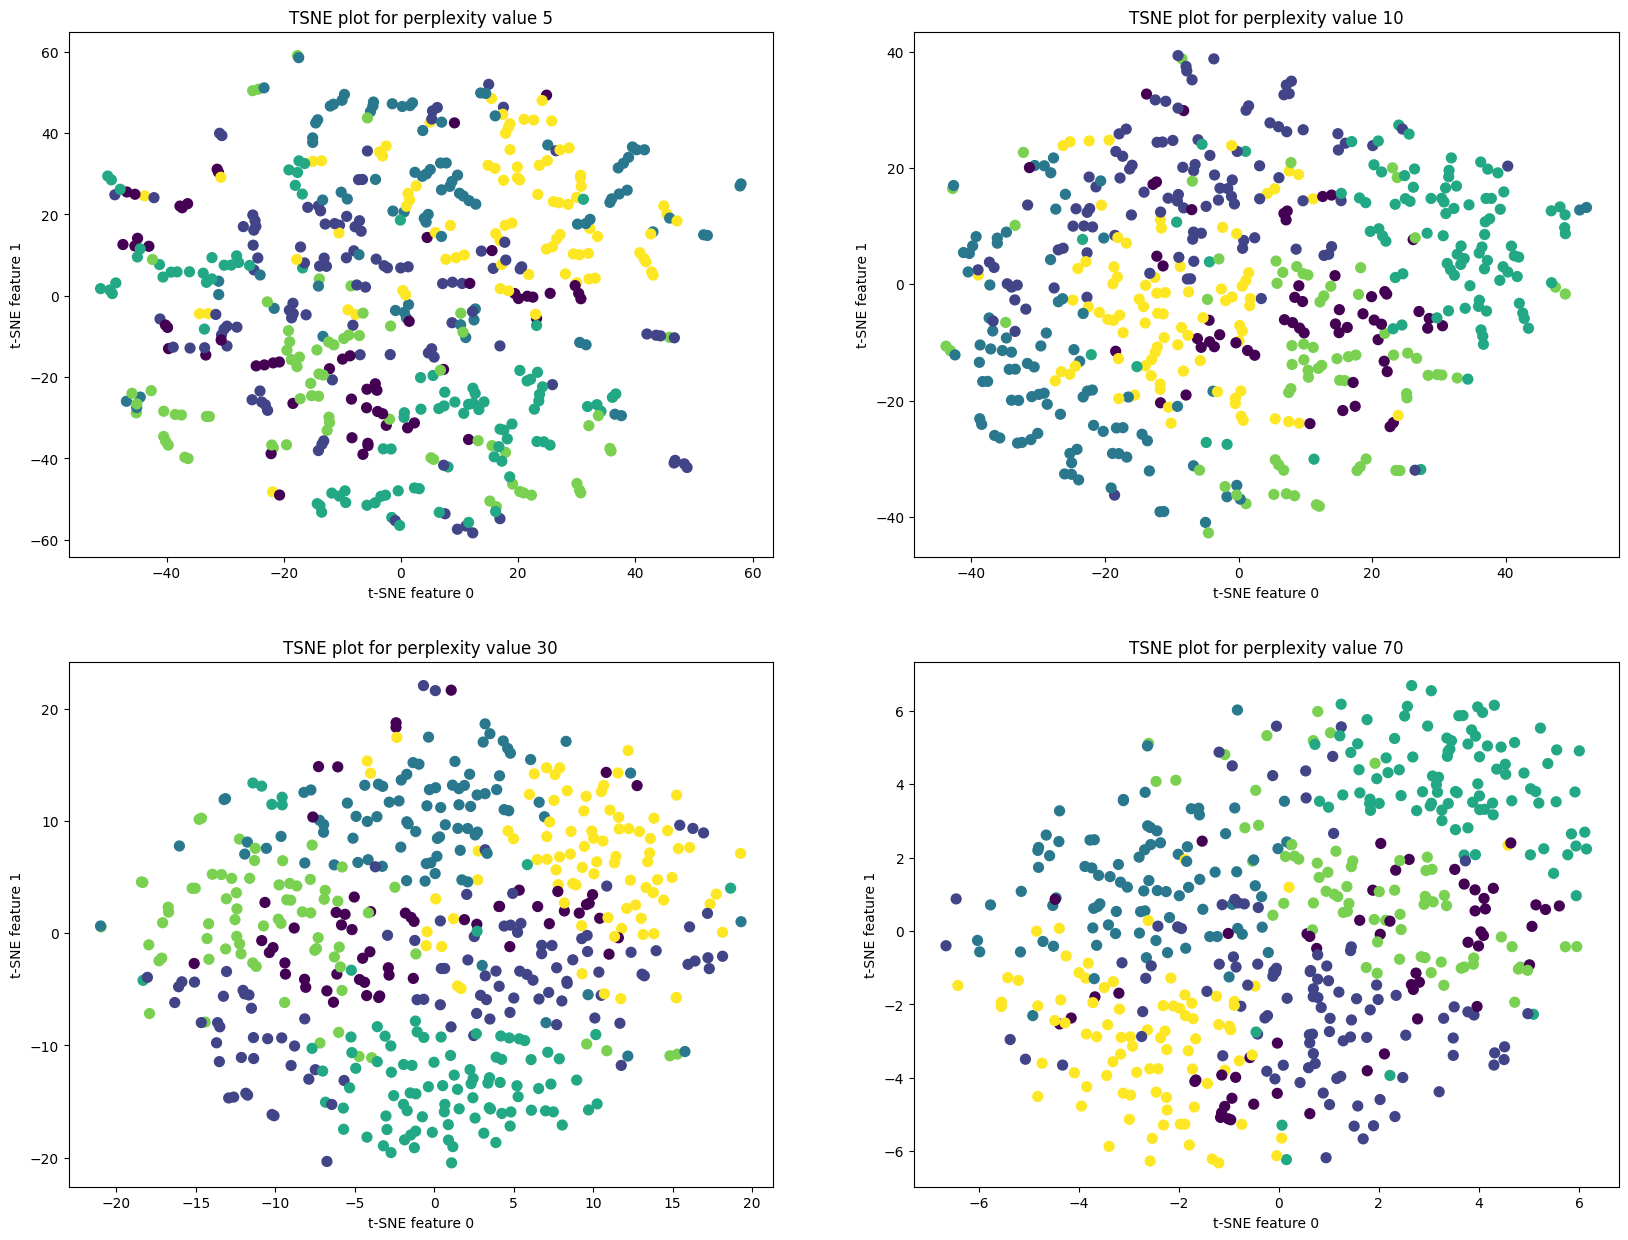

In [48]:
from sklearn.manifold import TSNE

fig, axes = plt.subplots(2,2, figsize=(20,15))

for perplexity_value, ax in zip([5,10,30,70], axes.ravel()):
    
    tsne = TSNE(perplexity = perplexity_value, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    
    ax.scatter(X_tsne[:,0], X_tsne[:,1], s=50, c=kmeans_6.labels_, cmap = 'viridis')
    ax.set_xlabel('t-SNE feature 0')
    ax.set_ylabel('t-SNE feature 1')
    ax.set_title(f'TSNE plot for perplexity value {perplexity_value}') 

both 30 and 70 represent the data well.

### 3.6. Visualize the clusters using UMAP, for 4 different values of the hyperparameter nearest neighbors. Color each cluster with a different color. Which value of the hyperparameter help the most to visualize the clusters, explain your choice (Clusters chosen in step 3). (3pt)

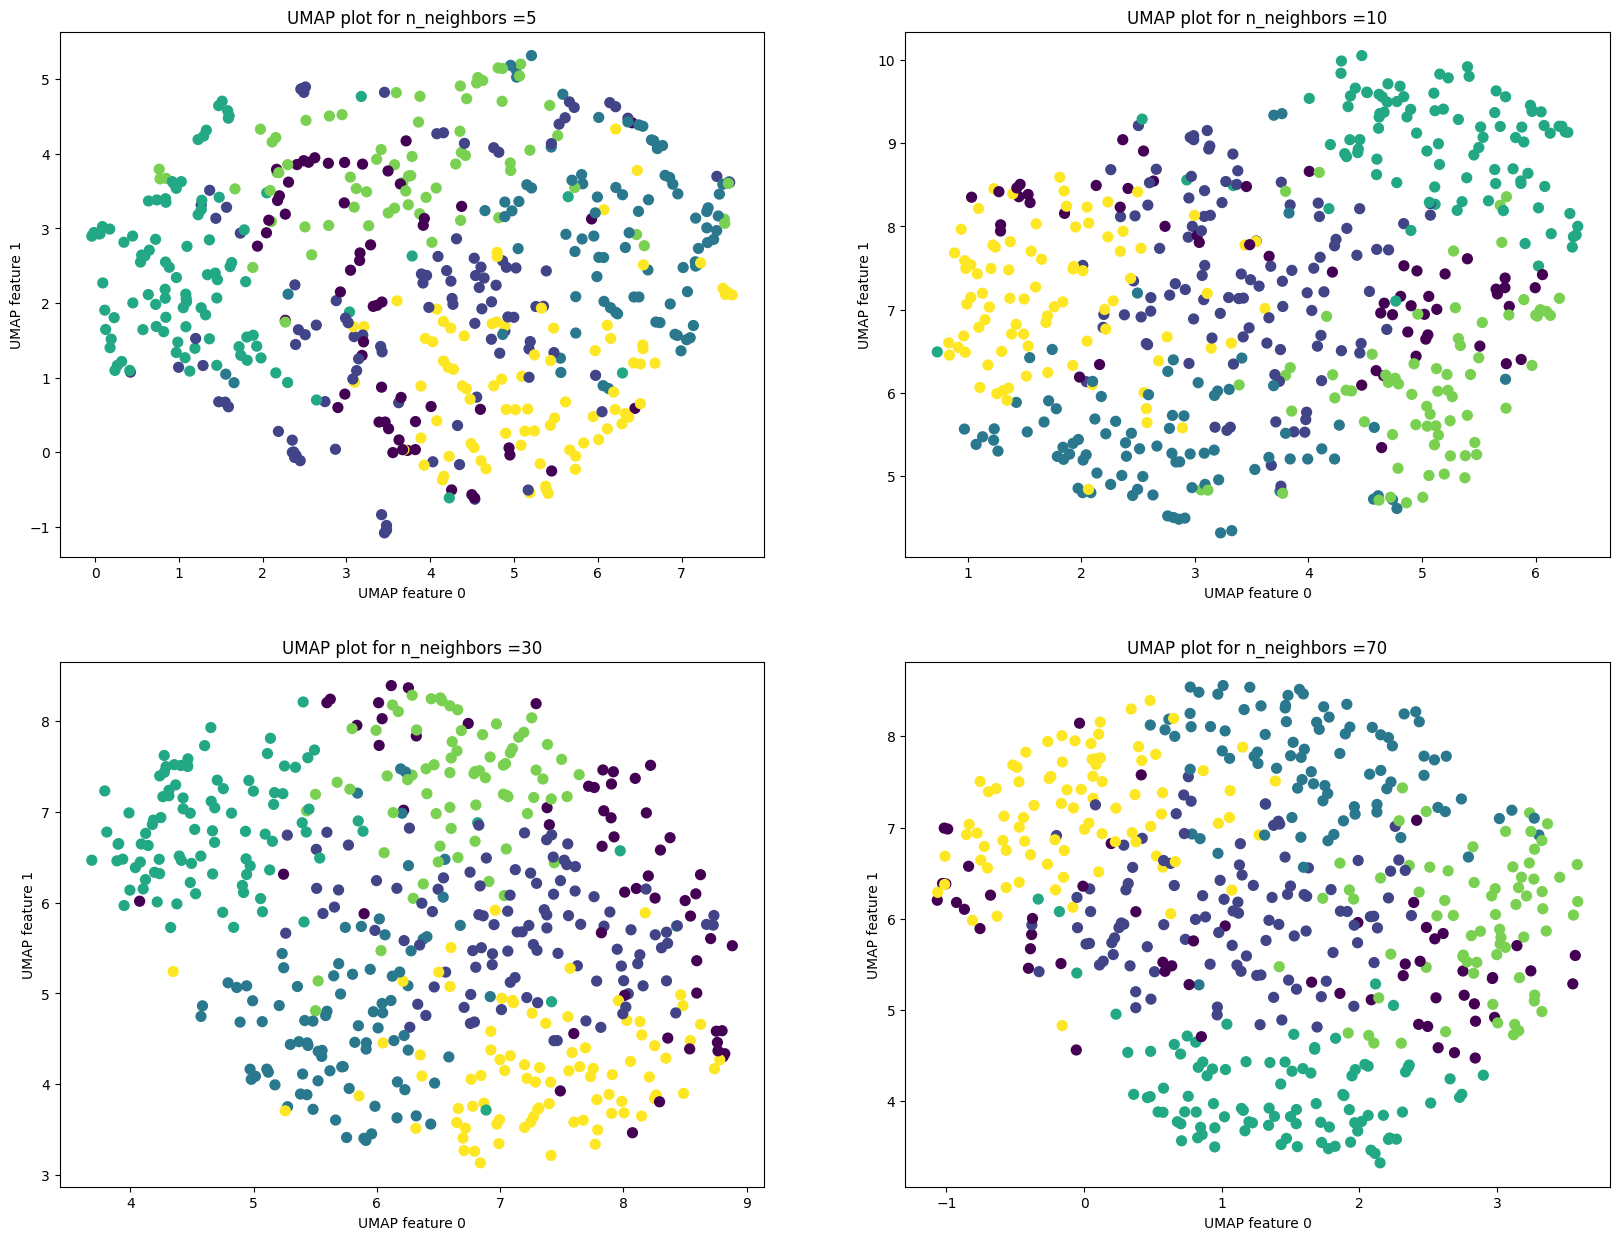

In [49]:
import umap.umap_ as UMAP

fig, axes = plt.subplots(2,2, figsize=(20,15))

for n_neighbors, ax in zip([5, 10, 30, 70], axes.ravel()):
    
    reducer = UMAP.UMAP(n_neighbors = n_neighbors, random_state=42)
    X_umap = reducer.fit_transform(X_scaled)
    
    ax.scatter(X_umap[:,0], X_umap[:,1], s=50, c=kmeans_6.labels_, cmap = 'viridis')
    ax.set_xlabel('UMAP feature 0')
    ax.set_ylabel('UMAP feature 1')
    ax.set_title(f'UMAP plot for n_neighbors ={n_neighbors}')  

both 30 and 70 represent the data well.

### 3.7. Use the cluster assignments as labels and run decision tree of depth 2 on the data (no need for train test split). Visualize the tree, print the total number of nodes, and create a DataFrame with only one column denoting the features importances in descending order. (3pts)

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = df3.values #using the original values because the decision tree algorithm does not require scaling.
y = kmeans_6.labels_
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X,y)

DecisionTreeClassifier(max_depth=2)

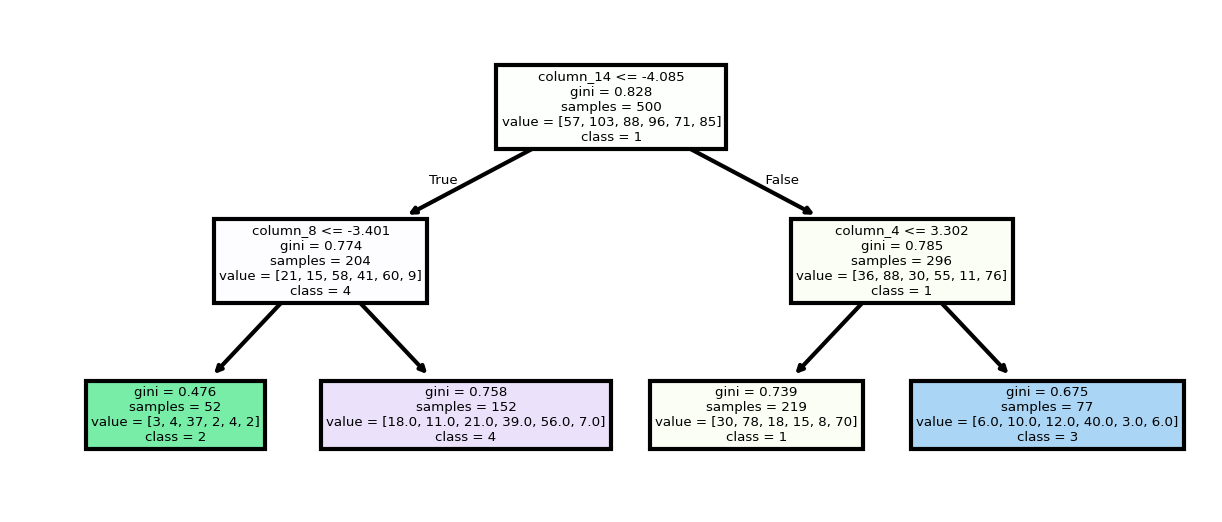

In [51]:
plt.figure(figsize=(5,2), dpi=300)
plot_tree(tree, class_names=[str(i) for i in range(7)], filled=True, feature_names = df3.columns)
plt.tight_layout;

In [52]:
print('Number of nodes is', tree.tree_.node_count)
print('Depth of the tree is', tree.tree_.max_depth)

Number of nodes is 7
Depth of the tree is 2


In [53]:
pd.DataFrame(data = tree.feature_importances_, 
             index = df3.columns, 
             columns = ['Feature Importances']).sort_values(by = ['Feature Importances'], ascending = False)

Feature Importances
column_14             0.393534
column_4              0.305914
column_8              0.300552
column_0              0.000000
column_1              0.000000
column_2              0.000000
column_3              0.000000
column_5              0.000000
column_6              0.000000
column_7              0.000000
column_9              0.000000
column_10             0.000000
column_11             0.000000
column_12             0.000000
column_13             0.000000

### 3.8. Run DBSCAN for values of epsilon 1, 2 and 3. What percentage of points do not get assigned to a single cluster for each value of epsilon? (2pts)

In [54]:
from sklearn.cluster import DBSCAN

pct_without_cluster = dict()

for eps in range(1,4):
    dbscan = DBSCAN(eps = eps)
    dbscan.fit(X_scaled)
    
    unique, counts = np.unique(dbscan.labels_,return_counts=True)
    pct_without_cluster[f'Epsilon {eps}'] = 100*( counts[0] / len(dbscan.labels_) )
    
print(pct_without_cluster)
print()

#the code below is only for the purpose of the last print statement.

eps_values_str = ", ".join([str(elem) for elem in list(pct_without_cluster.keys())[:-1]]) + ' and ' + str(list(pct_without_cluster.keys())[-1])
isolated_value_counts_str = ", ".join([str(elem)+'%' for elem in list(pct_without_cluster.values())[:-1]]) + ' and ' + str(list(pct_without_cluster.values())[-1])+'%'

print(f'The percentage of points not assigned to a single cluster with an epsilon value of {eps_values_str} is {isolated_value_counts_str}, respectively.')

{'Epsilon 1': 100.0, 'Epsilon 2': 100.0, 'Epsilon 3': 47.4}

The percentage of points not assigned to a single cluster with an epsilon value of Epsilon 1, Epsilon 2 and Epsilon 3 is 100.0%, 100.0% and 47.4%, respectively.


or

In [55]:
for eps in [1, 2, 3]:
    print('eps=', eps)
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(X_scaled)
    print('Clusters present',  np.unique(dbscan.labels_))
    print('Cluster sizes', str( 100*( np.bincount(dbscan.labels_ + 1)[0]/len(X_scaled) )) + '%')

eps= 1
Clusters present [-1]
Cluster sizes 100.0%
eps= 2
Clusters present [-1]
Cluster sizes 100.0%
eps= 3
Clusters present [-1  0]
Cluster sizes 47.4%
